In [10]:
import Ab4Paper2023
import AbstractTrees
import Makie
import CairoMakie
using Statistics: cor, cov, var
using AbstractTrees: PreOrderDFS

In [2]:
root_full = Ab4Paper2023.experiment_with_targets();
data_full = Ab4Paper2023.Data(root_full);

In [3]:
node_idx_full = Dict(n.label => t for (t, n) in enumerate(PreOrderDFS(root_full)));

In [4]:
θ1_black = data_full.counts[:, node_idx_full["black 1 o+"]] ./ data_full.counts[:, node_idx_full["root"]]
θ1_blue = data_full.counts[:, node_idx_full["blue 1 o+"]] ./ data_full.counts[:, node_idx_full["root"]]
θ1_mix = data_full.counts[:, node_idx_full["both 1 o+"]] ./ data_full.counts[:, node_idx_full["root"]]
θ1_bead = data_full.counts[:, node_idx_full["both 1 o-"]] ./ data_full.counts[:, node_idx_full["root"]]

θ2_black = data_full.counts[:, node_idx_full["black 2 o+"]] ./ data_full.counts[:, node_idx_full["black 2 in"]]
θ2_blue = data_full.counts[:, node_idx_full["blue 2 o+"]] ./ data_full.counts[:, node_idx_full["blue 2 in"]]
θ2_mix = data_full.counts[:, node_idx_full["both 2 o+"]] ./ data_full.counts[:, node_idx_full["both 2 in"]]
θ2_bead = data_full.counts[:, node_idx_full["both 2 o-"]] ./ data_full.counts[:, node_idx_full["both 2 in"]]

θ1_black ./= sum(filter(isfinite, θ1_black));
θ1_blue ./= sum(filter(isfinite, θ1_blue));
θ1_mix ./= sum(filter(isfinite, θ1_mix));
θ1_bead ./= sum(filter(isfinite, θ1_bead));

θ2_black ./= sum(filter(isfinite, θ2_black));
θ2_blue ./= sum(filter(isfinite, θ2_blue));
θ2_mix ./= sum(filter(isfinite, θ2_mix));
θ2_bead ./= sum(filter(isfinite, θ2_bead));

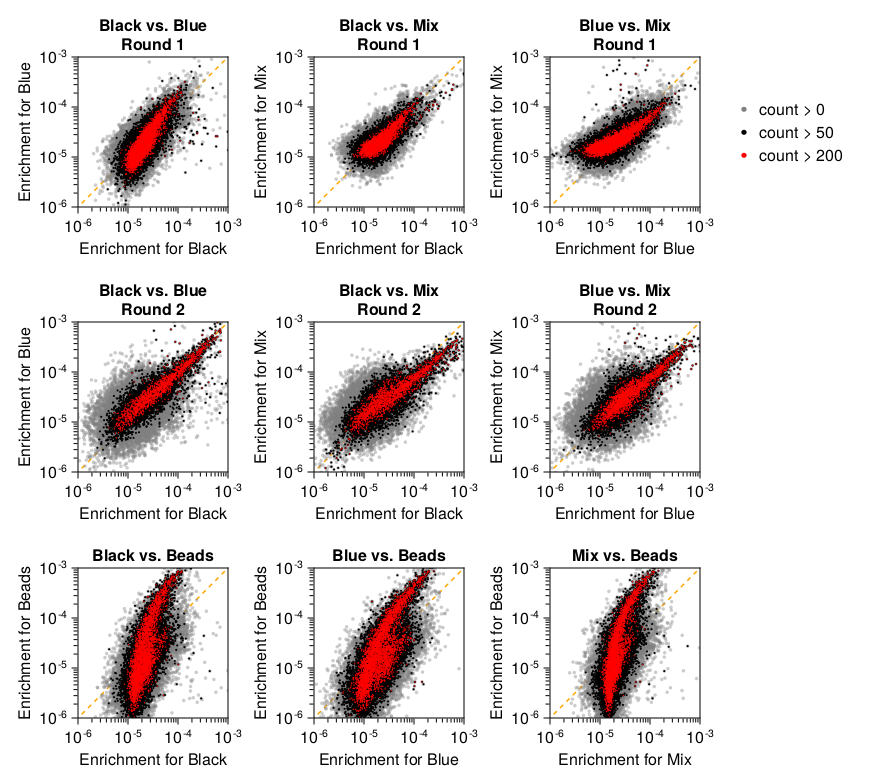

In [33]:
fig = Makie.Figure(; font = "CMU Serif")

common_axis_config = (; width=150, height=150, xscale=log10, yscale=log10,
    xminorticksvisible = true, yminorticksvisible = true,
    xminorticks = Makie.IntervalsBetween(10), yminorticks = Makie.IntervalsBetween(10),
    xgridvisible=false, ygridvisible=false,
)

ax_black_blue_1 = Makie.Axis(fig[1,1]; common_axis_config..., title = "Black vs. Blue\nRound 1", xlabel = "Enrichment for Black", ylabel = "Enrichment for Blue")
ax_black_mix_1 = Makie.Axis(fig[1,2]; common_axis_config..., title = "Black vs. Mix\nRound 1", xlabel = "Enrichment for Black", ylabel = "Enrichment for Mix")
ax_blue_mix_1 = Makie.Axis(fig[1,3]; common_axis_config..., title = "Blue vs. Mix\nRound 1", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Mix")

ax_black_blue_2 = Makie.Axis(fig[2,1]; common_axis_config..., title = "Black vs. Blue\nRound 2", xlabel = "Enrichment for Black", ylabel = "Enrichment for Blue")
ax_black_mix_2 = Makie.Axis(fig[2,2]; common_axis_config..., title = "Black vs. Mix\nRound 2", xlabel = "Enrichment for Black", ylabel = "Enrichment for Mix")
ax_blue_mix_2 = Makie.Axis(fig[2,3]; common_axis_config..., title = "Blue vs. Mix\nRound 2", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Mix")

ax_black_bead_1 = Makie.Axis(fig[3,1]; common_axis_config..., title = "Black vs. Beads", xlabel = "Enrichment for Black", ylabel = "Enrichment for Beads")
ax_blue_bead_1 = Makie.Axis(fig[3,2]; common_axis_config..., title = "Blue vs. Beads", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Beads")
ax_mix_bead_1 = Makie.Axis(fig[3,3]; common_axis_config..., title = "Mix vs. Beads", xlabel = "Enrichment for Mix", ylabel = "Enrichment for Beads")

# ax_black_bead_1 = Makie.Axis(fig[3,1]; common_axis_config..., title = "Black vs. Beads\nRound 1", xlabel = "Enrichment for Black", ylabel = "Enrichment for Beads")
# ax_blue_bead_1 = Makie.Axis(fig[3,2]; common_axis_config..., title = "Blue vs. Beads\nRound 1", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Beads")
# ax_mix_bead_1 = Makie.Axis(fig[3,3]; common_axis_config..., title = "Mix vs. Beads\nRound 1", xlabel = "Enrichment for Mix", ylabel = "Enrichment for Beads")

# ax_black_bead_2 = Makie.Axis(fig[4,1]; common_axis_config..., title = "Black vs. Beads\nRound 2", xlabel = "Enrichment for Black", ylabel = "Enrichment for Beads")
# ax_blue_bead_2 = Makie.Axis(fig[4,2]; common_axis_config..., title = "Blue vs. Beads\nRound 2", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Beads")
# ax_mix_bead_2 = Makie.Axis(fig[4,3]; common_axis_config..., title = "Mix vs. Beads\nRound 2", xlabel = "Enrichment for Mix", ylabel = "Enrichment for Beads")

all_axes = [
    ax_black_blue_1, ax_black_mix_1, ax_blue_mix_1,
    ax_black_blue_2, ax_black_mix_2, ax_blue_mix_2,
    ax_black_bead_1, ax_blue_bead_1, ax_mix_bead_1,
    #ax_black_bead_2, ax_blue_bead_2, ax_mix_bead_2
]

# diagonal line x=y to guide eye
for ax in all_axes
    Makie.lines!(ax, [1e-10, 1], [1e-10, 1], markersize=3, color=:orange, linestyle=:dash)
end

count_thresholds = [0, 50, 200]
threshold_opts = [
    (; markersize=5, color=:gray, alpha=0.4), # counts > 0
    (; markersize=3, color=:black), # counts > 50
    (; markersize=2, color=:red), # counts > 200
]

# store correlations
correlations_black_blue_1 = Float64[]
correlations_black_mix_1 = Float64[]
correlations_blue_mix_1 = Float64[]

correlations_black_blue_2 = Float64[]
correlations_black_mix_2 = Float64[]
correlations_blue_mix_2 = Float64[]

correlations_black_beads_1 = Float64[]
correlations_blue_beads_1 = Float64[]
correlations_mix_beads_1 = Float64[]

# linear fit coefficients
coeff_black_blue_1 = Float64[]
coeff_black_mix_1 = Float64[]
coeff_blue_mix_1 = Float64[]

coeff_black_blue_2 = Float64[]
coeff_black_mix_2 = Float64[]
coeff_blue_mix_2 = Float64[]

coeff_black_beads_1 = Float64[]
coeff_blue_beads_1 = Float64[]
coeff_mix_beads_1 = Float64[]


for (thresh, opts) in zip(count_thresholds, threshold_opts)
    # Round 1
    _filter = (
        (data_full.counts[:, node_idx_full["black 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["blue 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["root"]] .> thresh)
    )
    Makie.scatter!(ax_black_blue_1, θ1_black[_filter], θ1_blue[_filter]; opts..., label="counts > $thresh")
    push!(correlations_black_blue_1, cor(log.(θ1_black[_filter]), log.(θ1_blue[_filter])))
    push!(coeff_black_blue_1, cov(log.(θ1_black[_filter]), log.(θ1_blue[_filter])) / var(log.(θ1_black[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["black 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["root"]] .> thresh)
    )
    Makie.scatter!(ax_black_mix_1, θ1_black[_filter], θ1_mix[_filter]; opts..., label="counts > $thresh")
    push!(correlations_black_mix_1, cor(log.(θ1_black[_filter]), log.(θ1_mix[_filter])))
    push!(coeff_black_mix_1, cov(log.(θ1_black[_filter]), log.(θ1_mix[_filter])) / var(log.(θ1_black[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["blue 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["root"]] .> thresh)
    )
    Makie.scatter!(ax_blue_mix_1, θ1_blue[_filter], θ1_mix[_filter]; opts..., label="counts > $thresh")
    push!(correlations_blue_mix_1, cor(log.(θ1_blue[_filter]), log.(θ1_mix[_filter])))
    push!(coeff_blue_mix_1, cov(log.(θ1_blue[_filter]), log.(θ1_mix[_filter])) / var(log.(θ1_blue[_filter])))

    # Beads
    _filter = (
        (data_full.counts[:, node_idx_full["black 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 1 o-"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["root"]] .> thresh)
    )
    Makie.scatter!(ax_black_bead_1, θ1_black[_filter], θ1_bead[_filter]; opts..., label="counts > $thresh")
    push!(correlations_black_beads_1, cor(log.(θ1_black[_filter]), log.(θ1_bead[_filter])))
    push!(coeff_black_beads_1, cov(log.(θ1_black[_filter]), log.(θ1_bead[_filter])) / var(log.(θ1_black[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["blue 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 1 o-"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["root"]] .> thresh)
    )
    Makie.scatter!(ax_blue_bead_1, θ1_blue[_filter], θ1_bead[_filter]; opts..., label="counts > $thresh")
    push!(correlations_blue_beads_1, cor(log.(θ1_blue[_filter]), log.(θ1_bead[_filter])))
    push!(coeff_blue_beads_1, cov(log.(θ1_blue[_filter]), log.(θ1_bead[_filter])) / var(log.(θ1_blue[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["both 1 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 1 o-"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["root"]] .> thresh)
    )
    Makie.scatter!(ax_mix_bead_1, θ1_mix[_filter], θ1_bead[_filter]; opts..., label="counts > $thresh")
    push!(correlations_mix_beads_1, cor(log.(θ1_mix[_filter]), log.(θ1_bead[_filter])))
    push!(coeff_mix_beads_1, cov(log.(θ1_mix[_filter]), log.(θ1_bead[_filter])) / var(log.(θ1_mix[_filter])))

    # Round 2
    _filter = (
        (data_full.counts[:, node_idx_full["black 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["black 2 in"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["blue 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["blue 2 in"]] .> thresh)
    )
    Makie.scatter!(ax_black_blue_2, θ2_black[_filter], θ2_blue[_filter]; opts..., label="counts > $thresh")
    push!(correlations_black_blue_2, cor(log.(θ2_black[_filter]), log.(θ2_blue[_filter])))
    push!(coeff_black_blue_2, cov(log.(θ2_black[_filter]), log.(θ2_blue[_filter])) / var(log.(θ2_black[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["black 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["black 2 in"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 in"]] .> thresh)
    )
    Makie.scatter!(ax_black_mix_2, θ2_black[_filter], θ2_mix[_filter]; opts..., label="counts > $thresh")
    push!(correlations_black_mix_2, cor(log.(θ2_black[_filter]), log.(θ2_mix[_filter])))
    push!(coeff_black_mix_2, cov(log.(θ2_black[_filter]), log.(θ2_mix[_filter])) / var(log.(θ2_black[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["blue 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["blue 2 in"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 in"]] .> thresh)
    )
    Makie.scatter!(ax_blue_mix_2, θ2_blue[_filter], θ2_mix[_filter]; opts..., label="counts > $thresh")
    push!(correlations_blue_mix_2, cor(log.(θ2_blue[_filter]), log.(θ2_mix[_filter])))
    push!(coeff_blue_mix_2, cov(log.(θ2_blue[_filter]), log.(θ2_mix[_filter])) / var(log.(θ2_blue[_filter])))

    # Beads
    _filter = (
        (data_full.counts[:, node_idx_full["black 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["black 2 in"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 o-"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 in"]] .> thresh)
    )
    #Makie.scatter!(ax_black_bead_2, θ2_black[_filter], θ2_bead[_filter]; opts..., label="counts > $thresh")
    #push!(correlations_black_beads_2, cor(log.(θ2_black[_filter]), log.(θ2_bead[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["blue 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["blue 2 in"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 o-"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 in"]] .> thresh)
    )
    #Makie.scatter!(ax_blue_bead_2, θ2_blue[_filter], θ2_bead[_filter]; opts..., label="counts > $thresh")
    #push!(correlations_blue_beads_2, cor(log.(θ2_blue[_filter]), log.(θ2_bead[_filter])))

    _filter = (
        (data_full.counts[:, node_idx_full["both 2 o+"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 in"]] .> thresh) .&
        (data_full.counts[:, node_idx_full["both 2 o-"]] .> thresh)
    )
    #Makie.scatter!(ax_mix_bead_2, θ2_mix[_filter], θ2_bead[_filter]; opts..., label="counts > $thresh")
    #push!(correlations_mix_beads_2, cor(log.(θ2_mix[_filter]), log.(θ2_bead[_filter])))
end

for ax in all_axes
    Makie.xlims!(ax, 1e-6, 1e-3)
    Makie.ylims!(ax, 1e-6, 1e-3)
end

fig[1,4] = Makie.Legend(fig, 
    [
        Makie.MarkerElement(color=:gray, marker='●', markersize=7),
        Makie.MarkerElement(color=:black, marker='●', markersize=7),
        Makie.MarkerElement(color=:red, marker='●', markersize=7)
    ],
    ["count > 0", "count > 50", "count > 200"],
    framevisible=false
)
#Makie.axislegend(ax_black_mix_2, position=:rb)

Makie.resize_to_layout!(fig)
Makie.save("figures/empirical_enrichments.pdf", fig)
fig

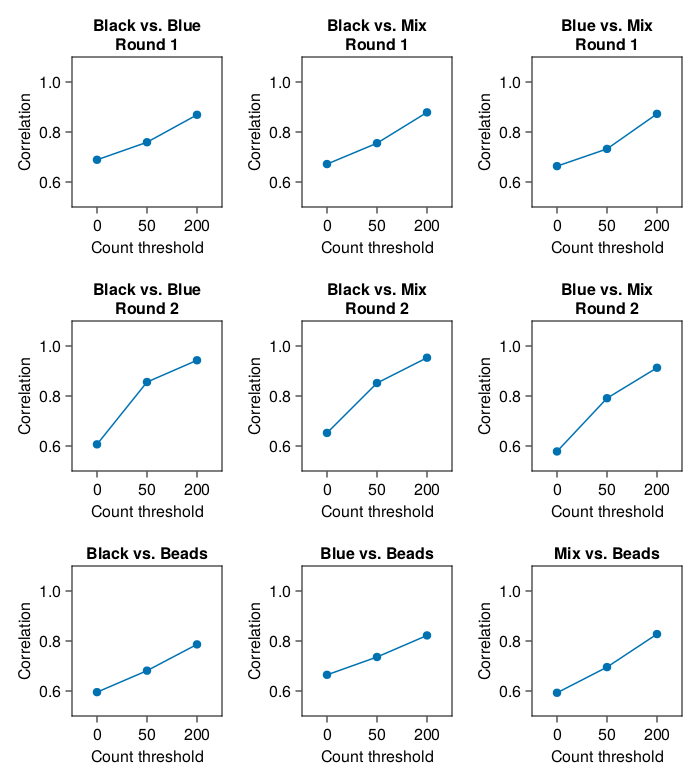

In [23]:
fig = Makie.Figure()

common_axis_config = (; width=150, height=150, xgridvisible=false, ygridvisible=false, 
    xlabel = "Count threshold", ylabel = "Correlation", 
    xticks=(1:3, ["0", "50", "200"]), yticks=[0.6, 0.8, 1]
)

ax_black_blue_1 = Makie.Axis(fig[1,1]; common_axis_config..., title = "Black vs. Blue\nRound 1")
ax_black_mix_1 = Makie.Axis(fig[1,2]; common_axis_config..., title = "Black vs. Mix\nRound 1")
ax_blue_mix_1 = Makie.Axis(fig[1,3]; common_axis_config..., title = "Blue vs. Mix\nRound 1")

ax_black_blue_2 = Makie.Axis(fig[2,1]; common_axis_config..., title = "Black vs. Blue\nRound 2")
ax_black_mix_2 = Makie.Axis(fig[2,2]; common_axis_config..., title = "Black vs. Mix\nRound 2")
ax_blue_mix_2 = Makie.Axis(fig[2,3]; common_axis_config..., title = "Blue vs. Mix\nRound 2")

ax_black_bead_1 = Makie.Axis(fig[3,1]; common_axis_config..., title = "Black vs. Beads")
ax_blue_bead_1 = Makie.Axis(fig[3,2]; common_axis_config..., title = "Blue vs. Beads")
ax_mix_bead_1 = Makie.Axis(fig[3,3]; common_axis_config..., title = "Mix vs. Beads")

# ax_black_bead_2 = Makie.Axis(fig[4,1]; common_axis_config..., title = "Round 2", xlabel = "Enrichment for Black", ylabel = "Enrichment for Beads")
# ax_blue_bead_2 = Makie.Axis(fig[4,2]; common_axis_config..., title = "Round 2", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Beads")
# ax_mix_bead_2 = Makie.Axis(fig[4,3]; common_axis_config..., title = "Round 2", xlabel = "Enrichment for Mix", ylabel = "Enrichment for Beads")

all_axes = [
    ax_black_blue_1, ax_black_mix_1, ax_blue_mix_1,
    ax_black_blue_2, ax_black_mix_2, ax_blue_mix_2,
    ax_black_bead_1, ax_blue_bead_1, ax_mix_bead_1,
    #ax_black_bead_2, ax_blue_bead_2, ax_mix_bead_2
]

Makie.scatterlines!(ax_black_blue_1, 1:3, correlations_black_blue_1)
Makie.scatterlines!(ax_black_mix_1, 1:3, correlations_black_mix_1)
Makie.scatterlines!(ax_blue_mix_1, 1:3, correlations_blue_mix_1)

Makie.scatterlines!(ax_black_blue_2, 1:3, correlations_black_blue_2)
Makie.scatterlines!(ax_black_mix_2, 1:3, correlations_black_mix_2)
Makie.scatterlines!(ax_blue_mix_2, 1:3, correlations_blue_mix_2)

Makie.scatterlines!(ax_black_bead_1, 1:3, correlations_black_beads_1)
Makie.scatterlines!(ax_blue_bead_1, 1:3, correlations_blue_beads_1)
Makie.scatterlines!(ax_mix_bead_1, 1:3, correlations_mix_beads_1)

# Makie.scatterlines!(ax_black_bead_2, 1:3, correlations_black_beads_2)
# Makie.scatterlines!(ax_blue_bead_2, 1:3, correlations_blue_beads_2)
# Makie.scatterlines!(ax_mix_bead_2, 1:3, correlations_mix_beads_2)

for ax in all_axes
    Makie.xlims!(ax, 0.5, 3.5)
    Makie.ylims!(ax, 0.5, 1.1)
end

Makie.resize_to_layout!(fig)
Makie.save("figures/empirical_enrichments_correlations.pdf", fig)
fig

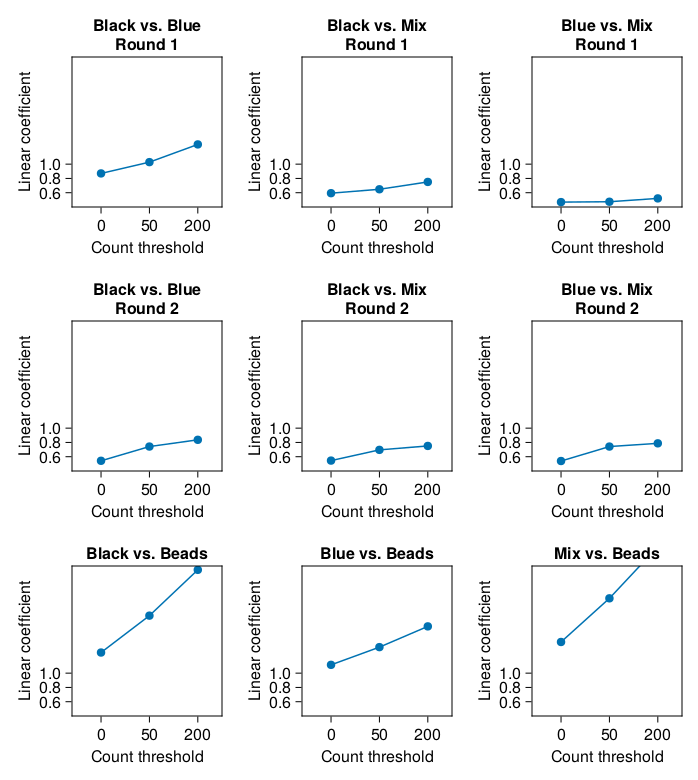

In [26]:
fig = Makie.Figure()

common_axis_config = (; width=150, height=150, xgridvisible=false, ygridvisible=false, 
    xlabel = "Count threshold", ylabel = "Linear coefficient", 
    xticks=(1:3, ["0", "50", "200"]), yticks=[0.6, 0.8, 1]
)

ax_black_blue_1 = Makie.Axis(fig[1,1]; common_axis_config..., title = "Black vs. Blue\nRound 1")
ax_black_mix_1 = Makie.Axis(fig[1,2]; common_axis_config..., title = "Black vs. Mix\nRound 1")
ax_blue_mix_1 = Makie.Axis(fig[1,3]; common_axis_config..., title = "Blue vs. Mix\nRound 1")

ax_black_blue_2 = Makie.Axis(fig[2,1]; common_axis_config..., title = "Black vs. Blue\nRound 2")
ax_black_mix_2 = Makie.Axis(fig[2,2]; common_axis_config..., title = "Black vs. Mix\nRound 2")
ax_blue_mix_2 = Makie.Axis(fig[2,3]; common_axis_config..., title = "Blue vs. Mix\nRound 2")

ax_black_bead_1 = Makie.Axis(fig[3,1]; common_axis_config..., title = "Black vs. Beads")
ax_blue_bead_1 = Makie.Axis(fig[3,2]; common_axis_config..., title = "Blue vs. Beads")
ax_mix_bead_1 = Makie.Axis(fig[3,3]; common_axis_config..., title = "Mix vs. Beads")

# ax_black_bead_2 = Makie.Axis(fig[4,1]; common_axis_config..., title = "Round 2", xlabel = "Enrichment for Black", ylabel = "Enrichment for Beads")
# ax_blue_bead_2 = Makie.Axis(fig[4,2]; common_axis_config..., title = "Round 2", xlabel = "Enrichment for Blue", ylabel = "Enrichment for Beads")
# ax_mix_bead_2 = Makie.Axis(fig[4,3]; common_axis_config..., title = "Round 2", xlabel = "Enrichment for Mix", ylabel = "Enrichment for Beads")

all_axes = [
    ax_black_blue_1, ax_black_mix_1, ax_blue_mix_1,
    ax_black_blue_2, ax_black_mix_2, ax_blue_mix_2,
    ax_black_bead_1, ax_blue_bead_1, ax_mix_bead_1,
    #ax_black_bead_2, ax_blue_bead_2, ax_mix_bead_2
]

Makie.scatterlines!(ax_black_blue_1, 1:3, coeff_black_blue_1)
Makie.scatterlines!(ax_black_mix_1, 1:3, coeff_black_mix_1)
Makie.scatterlines!(ax_blue_mix_1, 1:3, coeff_blue_mix_1)

Makie.scatterlines!(ax_black_blue_2, 1:3, coeff_black_blue_2)
Makie.scatterlines!(ax_black_mix_2, 1:3, coeff_black_mix_2)
Makie.scatterlines!(ax_blue_mix_2, 1:3, coeff_blue_mix_2)

Makie.scatterlines!(ax_black_bead_1, 1:3, coeff_black_beads_1)
Makie.scatterlines!(ax_blue_bead_1, 1:3, coeff_blue_beads_1)
Makie.scatterlines!(ax_mix_bead_1, 1:3, coeff_mix_beads_1)

# Makie.scatterlines!(ax_black_bead_2, 1:3, correlations_black_beads_2)
# Makie.scatterlines!(ax_blue_bead_2, 1:3, correlations_blue_beads_2)
# Makie.scatterlines!(ax_mix_bead_2, 1:3, correlations_mix_beads_2)

for ax in all_axes
    Makie.xlims!(ax, 0.4, 3.5)
    Makie.ylims!(ax, 0.4, 2.5)
end

Makie.resize_to_layout!(fig)
Makie.save("figures/empirical_enrichments_linear_coeff.pdf", fig)
fig

In [ ]:
correlations_black_blue_1
correlations_black_mix_1
correlations_blue_mix_1

correlations_black_blue_2
correlations_black_mix_2
correlations_blue_mix_2


In [ ]:
cor(log.(θ_black[_filter_0]), log.(θ_blue[_filter_0]))
cor(log.(θ_black[_filter_1]), log.(θ_blue[_filter_1]))
cor(log.(θ_black[_filter_2]), log.(θ_blue[_filter_2]))

In [ ]:


let fig = Makie.Figure()
    ax = Makie.Axis(fig[1,1], title="Empirical enrichments",
        width=500, height=500, xscale=log10, yscale=log10,
        xminorticksvisible = true, yminorticksvisible = true,
        xminorticks = Makie.IntervalsBetween(10), yminorticks = Makie.IntervalsBetween(10),
        xgridvisible=false, ygridvisible=false,
        xlabel = "Enrichment for Black", ylabel = "Enrichment for Blue"
    )
    Makie.scatter!(ax, θ_black, θ_blue, markersize=3, color=:red)
    Makie.lines!(ax, [0,1], [0,1], markersize=3, color=:red)
    Makie.xlims!(ax, 5e-7, 5e-3)
    Makie.ylims!(ax, 5e-7, 5e-3)
    Makie.resize_to_layout!(fig)
    #Makie.save("fig/initial_library_counts.pdf", fig)
    fig
end